In [271]:
# Load the Drive helper and mount
# from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
import matplotlib.colors as colors
import folium
from folium.plugins import MarkerCluster

In [272]:
# Load the Drive helper and mount
#drive.mount('/content/drive')

In [273]:
# drive_path = "/content/drive/MyDrive/Colab_Notebooks/Urban_Computing_Project/"
# data = pd.read_csv(drive_path + 'final.csv')
# data.columns
data = pd.read_csv('final.csv')

In [274]:
selected_columns = [
    'poverty.rate', 'pct.renter.occupied', 'median.gross.rent',
    'rent.burden', 'median.household.income', 'eviction.rate', 'population', 'ZHVI'
]

data = data.dropna(subset=selected_columns)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[selected_columns])

pca = PCA(n_components=1)
socioeconomic_index = pca.fit_transform(scaled_data)

data['SEIFA'] = socioeconomic_index

data[['GEOID', 'Year', 'RegionName', 'State', 'SEIFA']]

,GEOID,Year,RegionName,State,SEIFA
0,2100,2016,Haines Borough,Alaska,1.188686
1,1001,2008,Autauga County,Alabama,1.511512
2,1001,2009,Autauga County,Alabama,1.399270
3,1001,2011,Autauga County,Alabama,2.049829
4,1001,2012,Autauga County,Alabama,2.153825
...,...,...,...,...,...
11683,56041,2016,Uinta County,Wyoming,1.104672
11684,56043,2013,Washakie County,Wyoming,0.305065
11685,56043,2014,Washakie County,Wyoming,0.344891
11686,56043,2015,Washakie County,Wyoming,0.374666


In [275]:
data.to_csv('final_with_SEIFA.csv', index=False)

In [276]:
data

,GEOID,Year,RegionName,State,population,poverty.rate,renter.occupied.households,pct.renter.occupied,median.gross.rent,median.household.income,...,imputed,subbed,RegionID,SizeRank,RegionType,Metro,StateCodeFIPS,MunicipalCodeFIPS,ZHVI,SEIFA
0,2100,2016,Haines Borough,Alaska,2560,1.32,342,30.95,868.0,58750,...,0,1,1073,3112,county,NaN,2,100,0.000,1.188686
1,1001,2008,Autauga County,Alabama,49584,7.52,4593,22.45,779.0,51463,...,0,0,1524,904,county,"Montgomery, AL",1,1,1957993.489,1.511512
2,1001,2009,Autauga County,Alabama,49584,7.52,4783,22.45,779.0,51463,...,0,0,1524,904,county,"Montgomery, AL",1,1,1908526.012,1.399270
3,1001,2011,Autauga County,Alabama,55221,9.28,5040,26.08,883.0,51281,...,0,0,1524,904,county,"Montgomery, AL",1,1,1771719.315,2.049829
4,1001,2012,Autauga County,Alabama,55221,9.28,5107,26.08,883.0,51281,...,0,0,1524,904,county,"Montgomery, AL",1,1,1779734.674,2.153825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,56041,2016,Uinta County,Wyoming,20930,10.81,2195,26.95,641.0,56569,...,0,0,760,1852,county,"Evanston, WY",56,41,2258164.400,1.104672
11684,56043,2013,Washakie County,Wyoming,8400,10.08,974,26.25,605.0,47652,...,0,0,2593,2673,county,NaN,56,43,1821669.197,0.305065
11685,56043,2014,Washakie County,Wyoming,8400,10.08,988,26.25,605.0,47652,...,0,0,2593,2673,county,NaN,56,43,1837394.906,0.344891
11686,56043,2015,Washakie County,Wyoming,8400,10.08,1002,26.25,605.0,47652,...,0,0,2593,2673,county,NaN,56,43,1905471.802,0.374666


In [277]:
data.to_csv('final_with_SEIFA_Label.csv', index=False)

In [278]:
data['Rank'] = data.groupby('Year')['SEIFA'].rank(ascending=False)

data = data.sort_values(['GEOID', 'Year']).reset_index(drop=True)

data['Rank_Change'] = data.groupby('GEOID')['Rank'].diff()

std_dev = data['Rank_Change'].std()
data['Rank_Change_SD'] = std_dev

data['Classification'] = data['Rank_Change'].apply(
    lambda x: 'Gentrifying' if x > std_dev else 'Not Gentrifying'
)

In [279]:
data.to_csv('data_with_gentrification_classification_and_sd.csv', index=False)

In [280]:
data

,GEOID,Year,RegionName,State,population,poverty.rate,renter.occupied.households,pct.renter.occupied,median.gross.rent,median.household.income,...,RegionType,Metro,StateCodeFIPS,MunicipalCodeFIPS,ZHVI,SEIFA,Rank,Rank_Change,Rank_Change_SD,Classification
0,1001,2008,Autauga County,Alabama,49584,7.52,4593,22.45,779.0,51463,...,county,"Montgomery, AL",1,1,1957993.489,1.511512,114.0,NaN,59.647871,Not Gentrifying
1,1001,2009,Autauga County,Alabama,49584,7.52,4783,22.45,779.0,51463,...,county,"Montgomery, AL",1,1,1908526.012,1.399270,131.0,17.0,59.647871,Not Gentrifying
2,1001,2011,Autauga County,Alabama,55221,9.28,5040,26.08,883.0,51281,...,county,"Montgomery, AL",1,1,1771719.315,2.049829,133.0,2.0,59.647871,Not Gentrifying
3,1001,2012,Autauga County,Alabama,55221,9.28,5107,26.08,883.0,51281,...,county,"Montgomery, AL",1,1,1779734.674,2.153825,122.0,-11.0,59.647871,Not Gentrifying
4,1001,2013,Autauga County,Alabama,55221,9.28,5174,26.08,883.0,51281,...,county,"Montgomery, AL",1,1,1823698.983,2.219181,111.0,-11.0,59.647871,Not Gentrifying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11677,56041,2016,Uinta County,Wyoming,20930,10.81,2195,26.95,641.0,56569,...,county,"Evanston, WY",56,41,2258164.400,1.104672,266.0,-8.0,59.647871,Not Gentrifying
11678,56043,2013,Washakie County,Wyoming,8400,10.08,974,26.25,605.0,47652,...,county,NaN,56,43,1821669.197,0.305065,432.0,NaN,59.647871,Not Gentrifying
11679,56043,2014,Washakie County,Wyoming,8400,10.08,988,26.25,605.0,47652,...,county,NaN,56,43,1837394.906,0.344891,428.0,-4.0,59.647871,Not Gentrifying
11680,56043,2015,Washakie County,Wyoming,8400,10.08,1002,26.25,605.0,47652,...,county,NaN,56,43,1905471.802,0.374666,435.0,7.0,59.647871,Not Gentrifying


In [281]:
data.Classification.value_counts()

Classification
Not Gentrifying    9956
Gentrifying        1726
Name: count, dtype: int64

<Axes: >

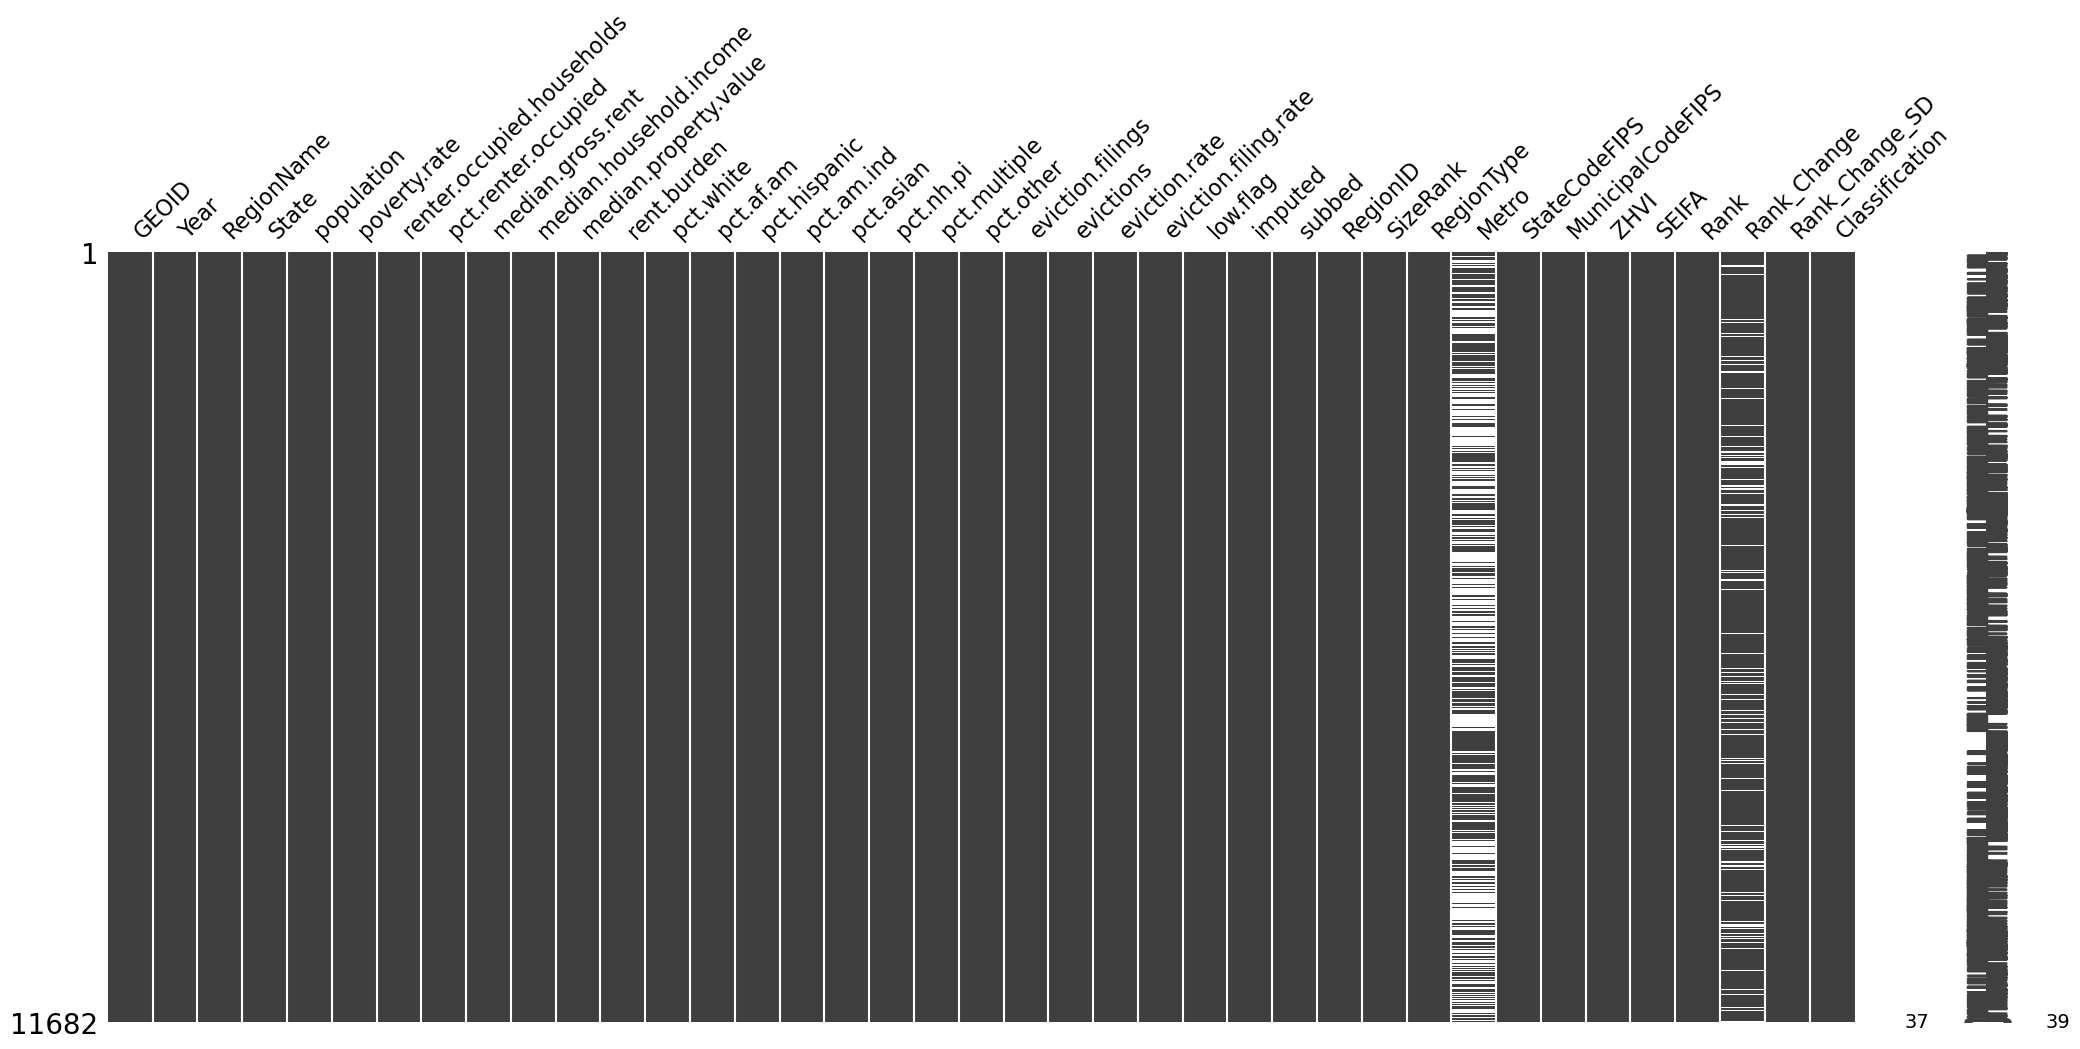

In [282]:
msno.matrix(data)

In [283]:
print(f"Data size before: {data.shape}")

# Identify numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Group by county (GEOID) and calculate median for each feature
county_medians = data.groupby('GEOID')[numeric_columns].median()

# Function to fill NaN values with county median
def fill_with_county_median(group):
    for col in numeric_columns:
        group[col] = group[col].fillna(county_medians.loc[group.name, col])
    return group

# Apply the function to each county group
data = data.groupby('GEOID').apply(fill_with_county_median)

# Reset index if needed
data = data.reset_index(drop=True)

print(f"Data size after: {data.shape}")

Data size before: (11682, 39)
Data size after: (11682, 39)


/var/folders/gn/2snxnw0d43nbcsdsz8xvy5cr0000gn/T/ipykernel_69464/2841397106.py:16: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [284]:
# Verify if there are any remaining null values
print(data.isnull().sum())

GEOID                            0
Year                             0
RegionName                       0
State                            0
population                       0
poverty.rate                     0
renter.occupied.households       0
pct.renter.occupied              0
median.gross.rent                0
median.household.income          0
median.property.value            0
rent.burden                      0
pct.white                        0
pct.af.am                        0
pct.hispanic                     0
pct.am.ind                       0
pct.asian                        0
pct.nh.pi                        0
pct.multiple                     0
pct.other                        0
eviction.filings                 0
evictions                        0
eviction.rate                    0
eviction.filing.rate             0
low.flag                         0
imputed                          0
subbed                           0
RegionID                         0
SizeRank            

In [285]:
# For Metro column
data['Metro'] = data.groupby('GEOID')['Metro'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))

# For Rank_Change column
data['Rank_Change'] = data['Rank_Change'].fillna(data['Rank_Change'].median())

print(f"Data size after: {data.shape}")

Data size after: (11682, 39)


Number of null values: 0


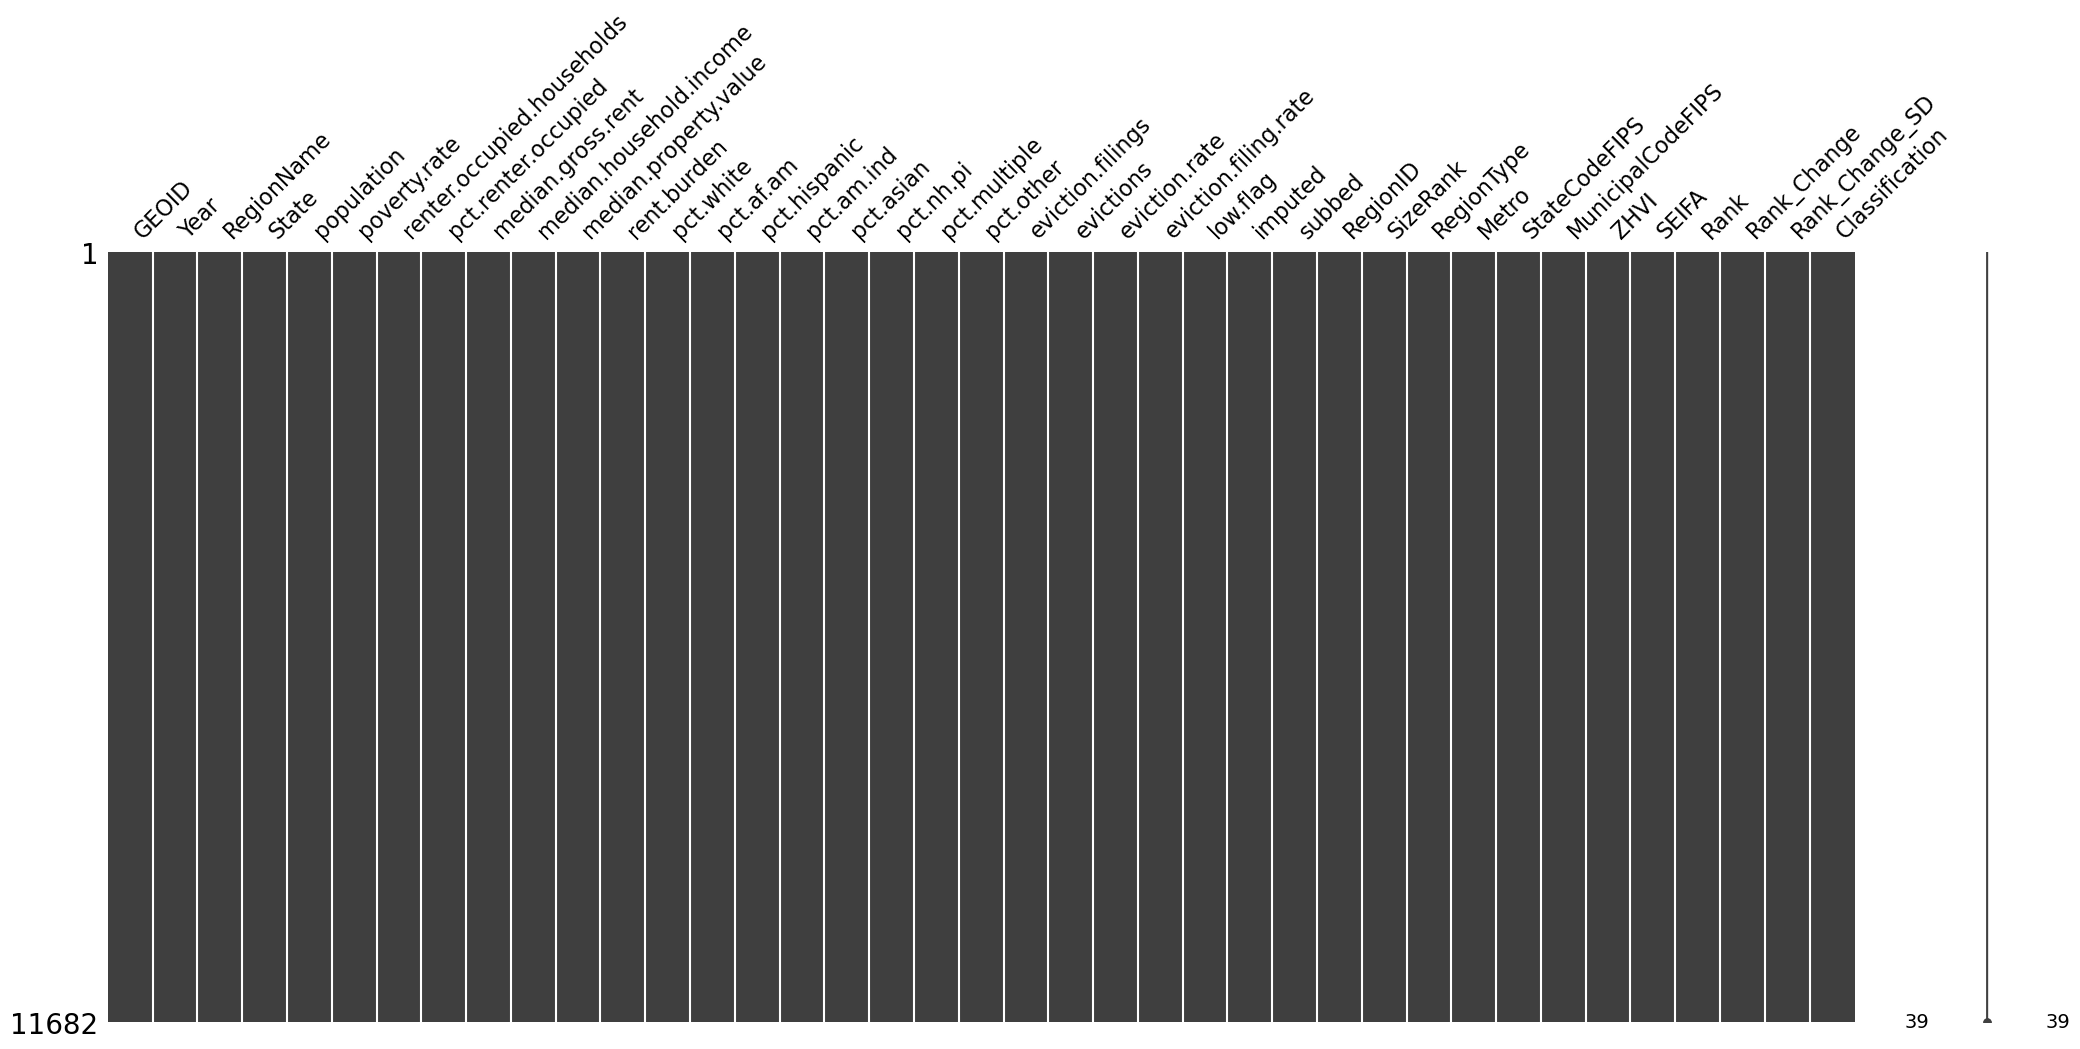

In [286]:
# Verify if there are any remaining null values
msno.matrix(data)
print(f"Number of null values: {data.isnull().sum().sum()}")

In [287]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11682 entries, 0 to 11681
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GEOID                       11682 non-null  int64  
 1   Year                        11682 non-null  int64  
 2   RegionName                  11682 non-null  object 
 3   State                       11682 non-null  object 
 4   population                  11682 non-null  int64  
 5   poverty.rate                11682 non-null  float64
 6   renter.occupied.households  11682 non-null  int64  
 7   pct.renter.occupied         11682 non-null  float64
 8   median.gross.rent           11682 non-null  float64
 9   median.household.income     11682 non-null  int64  
 10  median.property.value       11682 non-null  int64  
 11  rent.burden                 11682 non-null  float64
 12  pct.white                   11682 non-null  float64
 13  pct.af.am                   116

In [288]:
data["ZHVI"].min(), data["ZHVI"].max(), data["ZHVI"].mean()

(0.0, 14330417.79, 866621.7385735114)

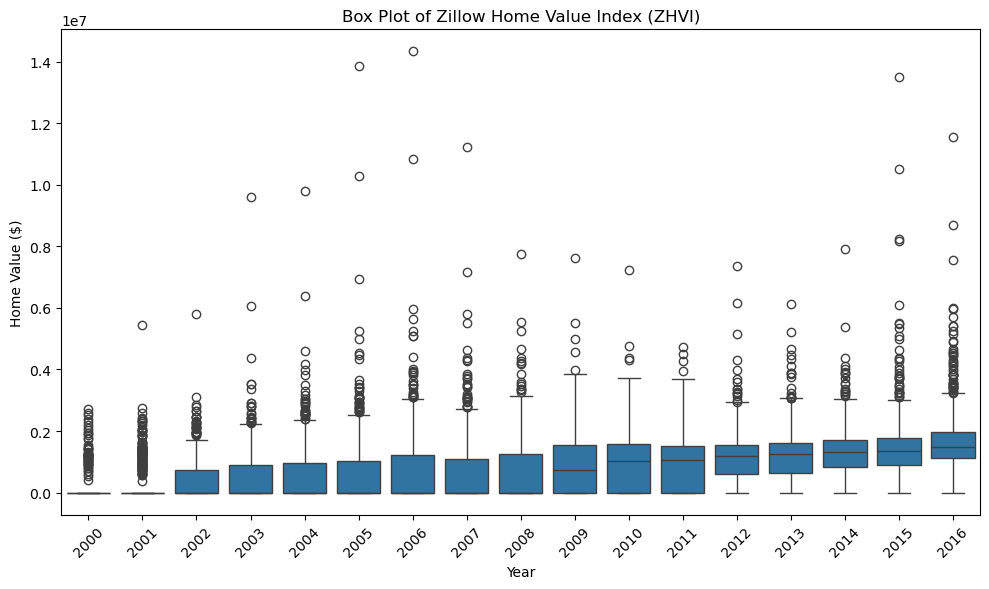

In [289]:
# Assuming you have already loaded your ZHVI data into a DataFrame called 'zhvi_data'

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Year', y='ZHVI')

# Customize the plot
plt.title('Box Plot of Zillow Home Value Index (ZHVI)')
plt.ylabel('Home Value ($)')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [290]:
data.ZHVI.describe()


count    1.168200e+04
mean     8.666217e+05
std      1.026282e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.062850e+05
75%      1.475364e+06
max      1.433042e+07
Name: ZHVI, dtype: float64

In [291]:
data.shape

(11682, 39)

/var/folders/gn/2snxnw0d43nbcsdsz8xvy5cr0000gn/T/ipykernel_69464/2331655700.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




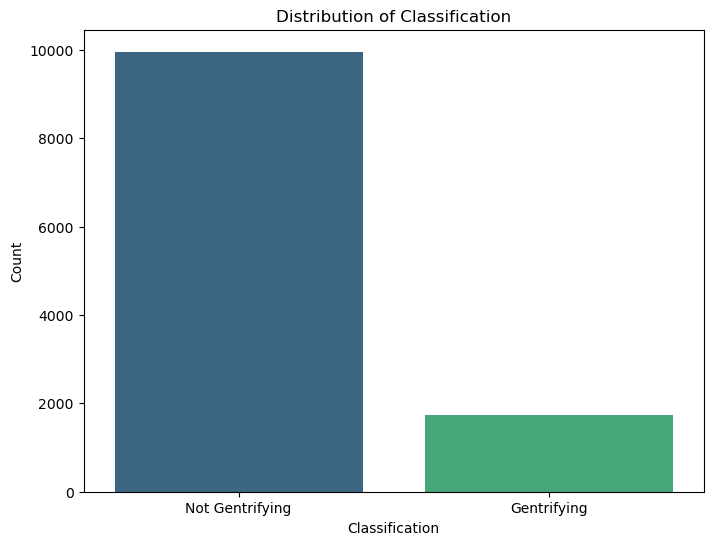

In [292]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Classification', palette='viridis')
plt.title('Distribution of Classification')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

/var/folders/gn/2snxnw0d43nbcsdsz8xvy5cr0000gn/T/ipykernel_69464/1785705643.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




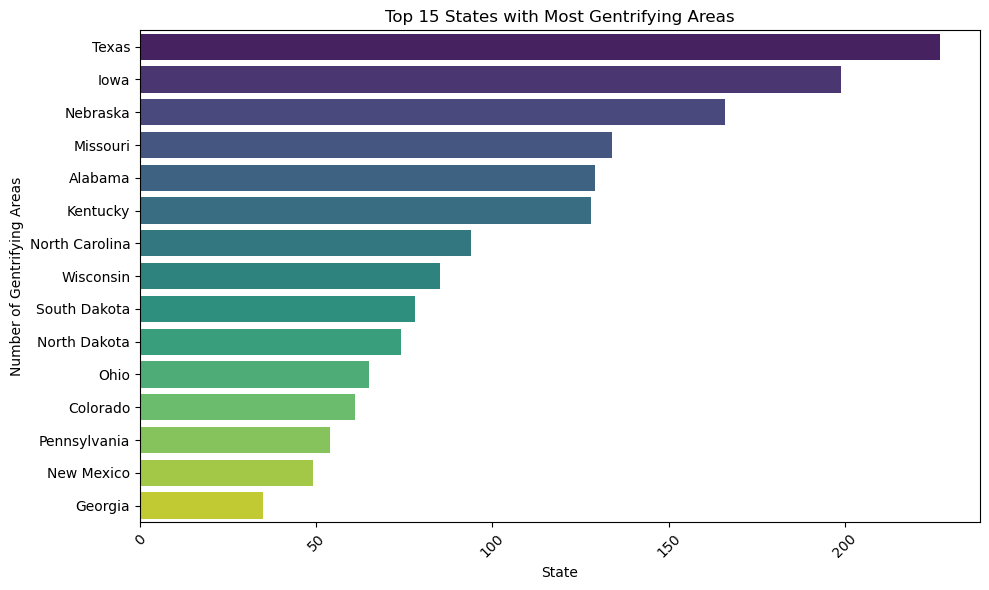

In [293]:
# Bar plot for most frequently gentrifying states
gentrifying_states = data[data['Classification'] == 'Gentrifying']['State'].value_counts().nlargest(15)
plt.figure(figsize=(10,6))
sns.barplot(y=gentrifying_states.index, x=gentrifying_states.values, palette='viridis', orient='h')
plt.title('Top 15 States with Most Gentrifying Areas')
plt.xlabel('State')
plt.ylabel('Number of Gentrifying Areas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/gn/2snxnw0d43nbcsdsz8xvy5cr0000gn/T/ipykernel_69464/2993335650.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




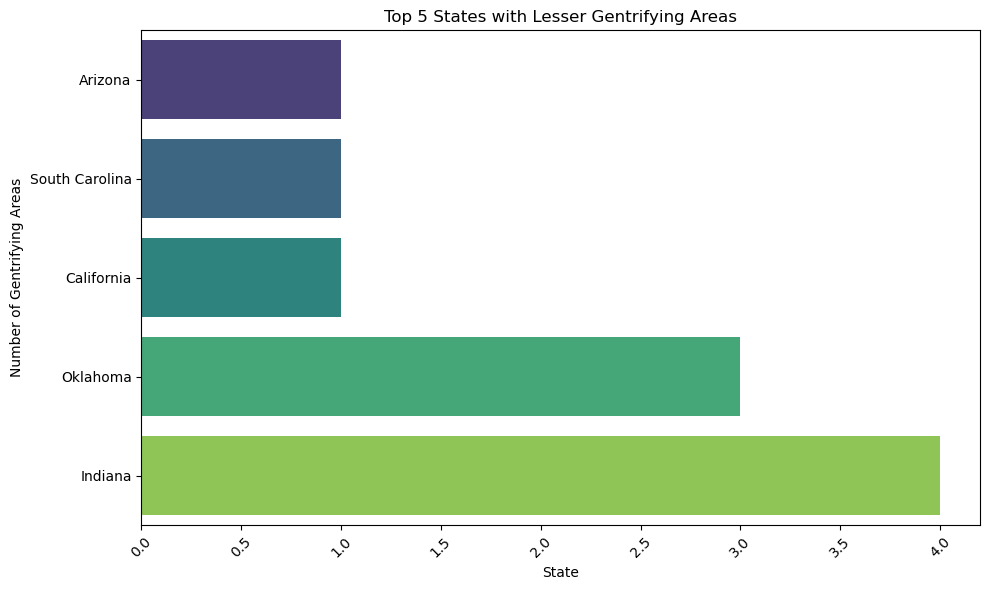

In [294]:
# Bar plot for less frequently gentrifying states
gentrifying_states = data[data['Classification'] == 'Gentrifying']['State'].value_counts().nsmallest(5)
plt.figure(figsize=(10,6))
sns.barplot(y=gentrifying_states.index, x=gentrifying_states.values, palette='viridis', orient='h')
plt.title('Top 5 States with Lesser Gentrifying Areas')
plt.xlabel('State')
plt.ylabel('Number of Gentrifying Areas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/gn/2snxnw0d43nbcsdsz8xvy5cr0000gn/T/ipykernel_69464/3474854940.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




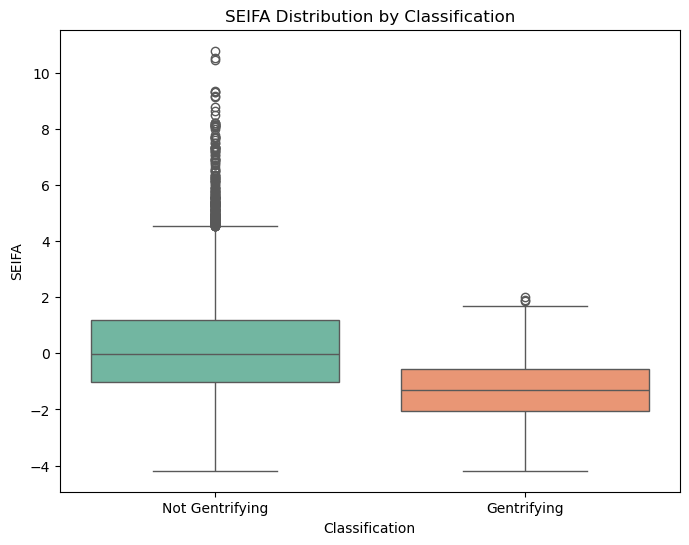

In [295]:
def seifa_classification():
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='Classification', y='SEIFA', palette='Set2')
    plt.title('SEIFA Distribution by Classification')
    plt.xlabel('Classification')
    plt.ylabel('SEIFA')
    plt.show()

seifa_classification()

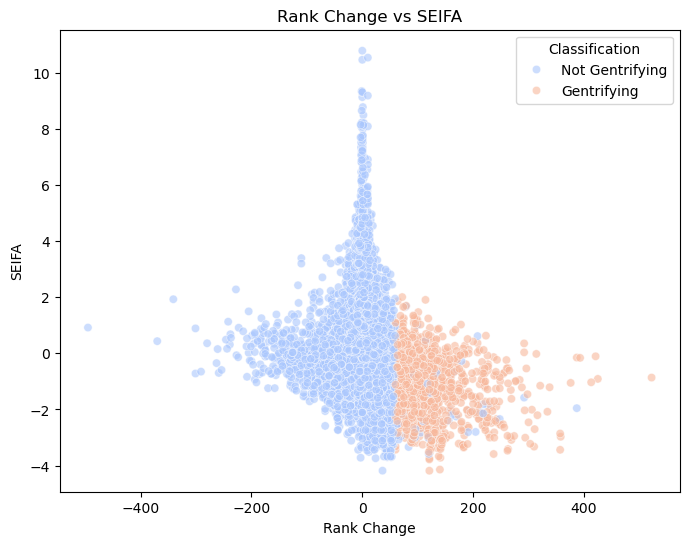

In [296]:
def rank_change_seifa():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='Rank_Change', y='SEIFA', hue='Classification', palette='coolwarm', alpha=0.6)
    plt.title('Rank Change vs SEIFA')
    plt.xlabel('Rank Change')
    plt.ylabel('SEIFA')
    plt.legend(title='Classification')
    plt.show()

rank_change_seifa()

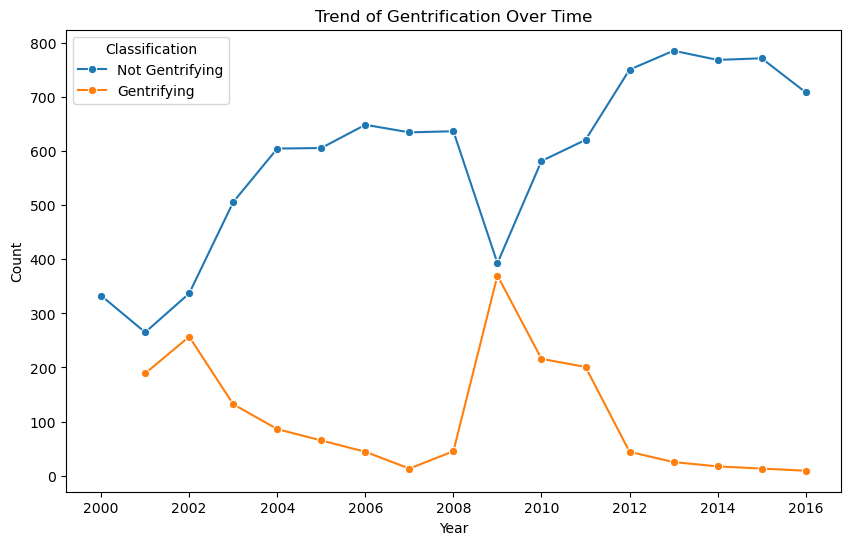

In [297]:
def gentrification_trend_time():
    gentrification_trend = data.groupby(['Year', 'Classification']).size().reset_index(name='Count')

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=gentrification_trend, x='Year', y='Count', hue='Classification', marker="o")
    plt.title('Trend of Gentrification Over Time')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(title='Classification')
    plt.show()

gentrification_trend_time()

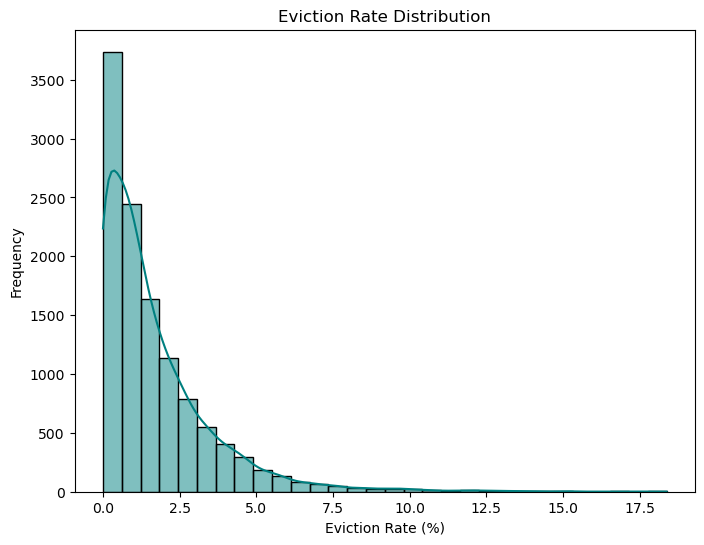

In [298]:
def eviction_rate():
    plt.figure(figsize=(8, 6))
    sns.histplot(data['eviction.rate'], kde=True, bins=30, color="teal")
    plt.title('Eviction Rate Distribution')
    plt.xlabel('Eviction Rate (%)')
    plt.ylabel('Frequency')
    plt.show()

eviction_rate()

In [299]:
# First, create a dictionary to map states to regions
region_mapping = {
    'West': ['California', 'Oregon', 'Washington', 'Nevada', 'Idaho', 'Utah', 'Arizona', 'Alaska', 'Hawaii'],
    'Central': ['Montana', 'Wyoming', 'Colorado', 'New Mexico', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Oklahoma', 'Texas', 'Minnesota', 
                'Iowa', 'Missouri', 'Arkansas', 'Louisiana', 'Wisconsin', 'Illinois', 'Michigan', 'Indiana', 'Ohio'],
    'East': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey', 'Delaware', 
             'Maryland', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Alabama', 
             'Mississippi']
}

# Create a new column 'Region' based on the state
data['Region'] = data['State'].map({state: region for region, states in region_mapping.items() for state in states})

# Group the data by Year and Region, and calculate the mean ZHVI for each group
grouped_data = data.groupby(['Year', 'Region'])['ZHVI'].mean().reset_index()

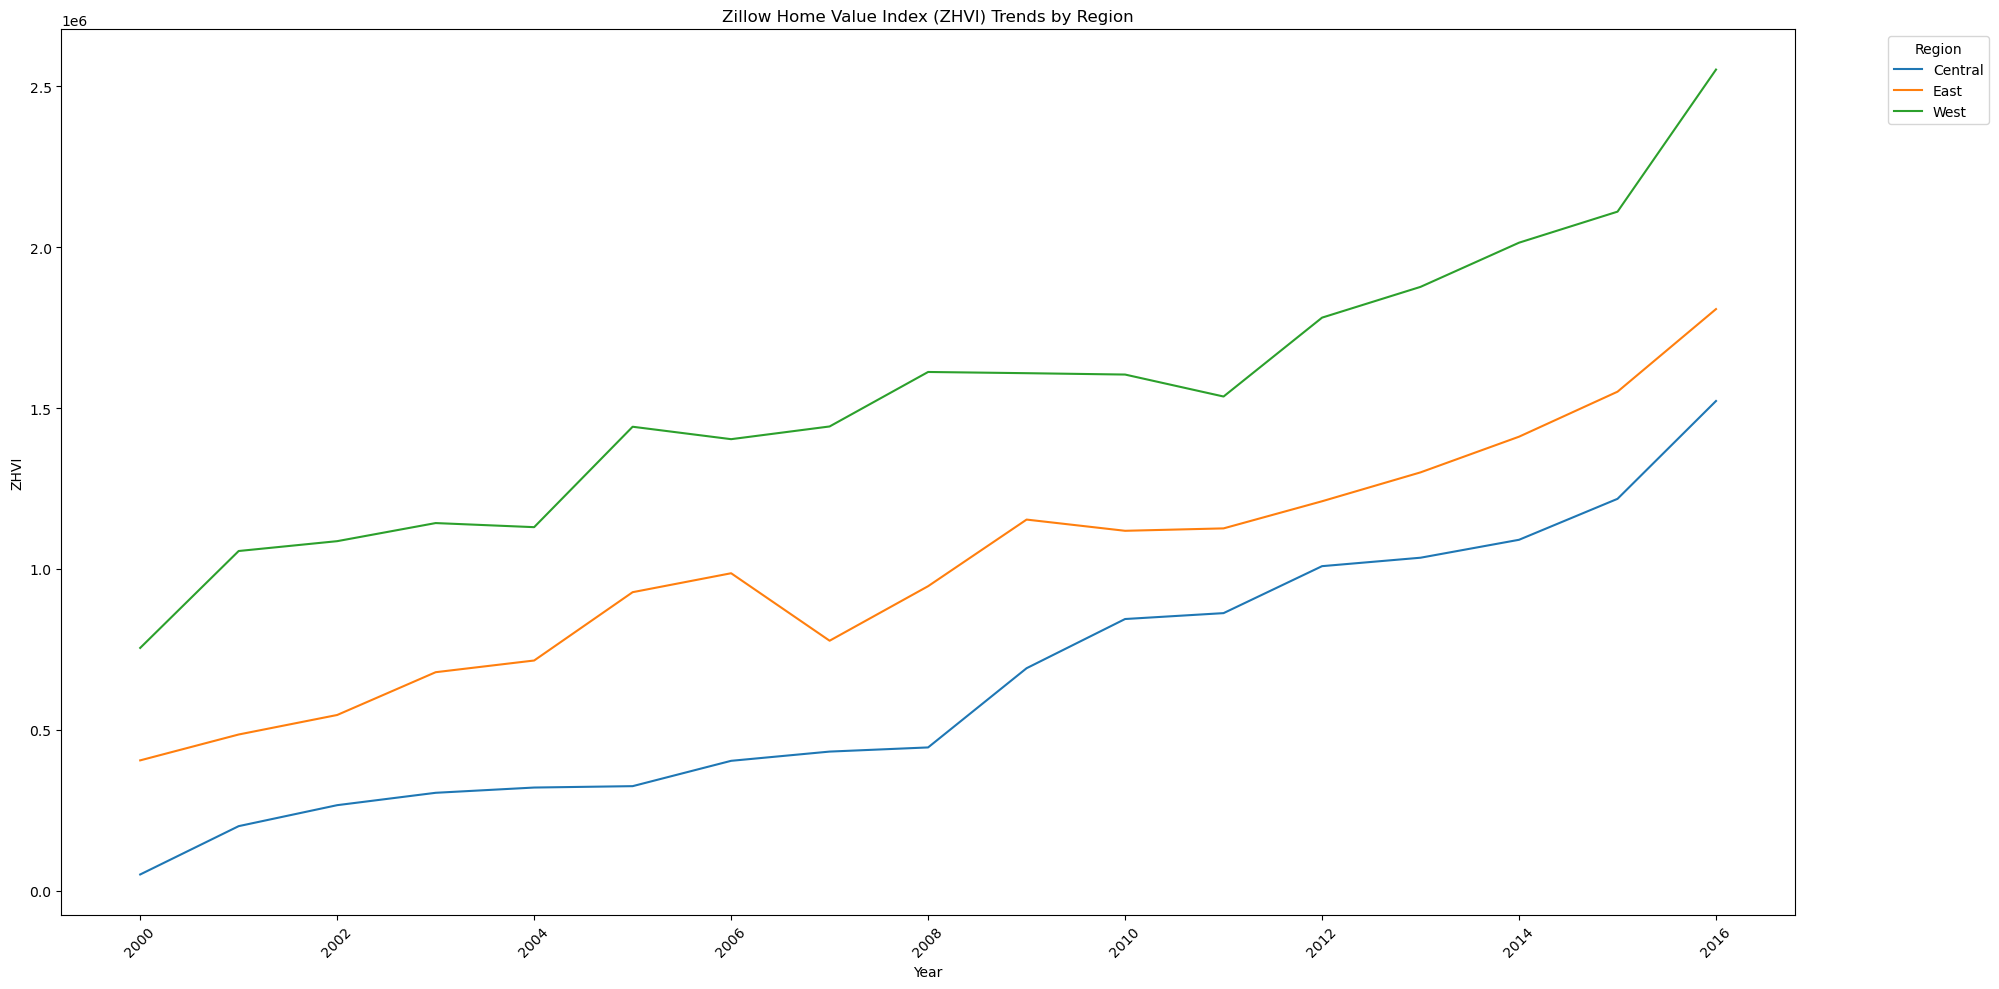

In [300]:
def zhvi_region():
    # Create the plot
    plt.figure(figsize=(20, 10))
    sns.lineplot(data=grouped_data, x='Year', y='ZHVI', hue='Region')
    plt.title('Zillow Home Value Index (ZHVI) Trends by Region')
    plt.ylabel('ZHVI')
    plt.xticks(rotation=45)
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

zhvi_region()

<Figure size 1200x800 with 0 Axes>

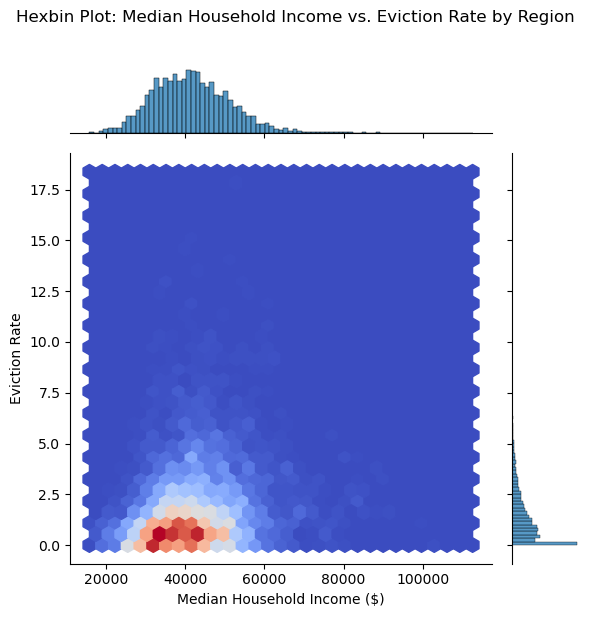

In [301]:
def income_eviction_region():
    plt.figure(figsize=(12, 8))
    sns.jointplot(
        data=data,
        x='median.household.income',
        y='eviction.rate',
        kind='hex',
        gridsize=30,
        cmap='coolwarm'
    )
    plt.suptitle('Hexbin Plot: Median Household Income vs. Eviction Rate by Region', y=1.02)
    plt.xlabel('Median Household Income ($)')
    plt.ylabel('Eviction Rate')
    plt.tight_layout()
    plt.show()

income_eviction_region()

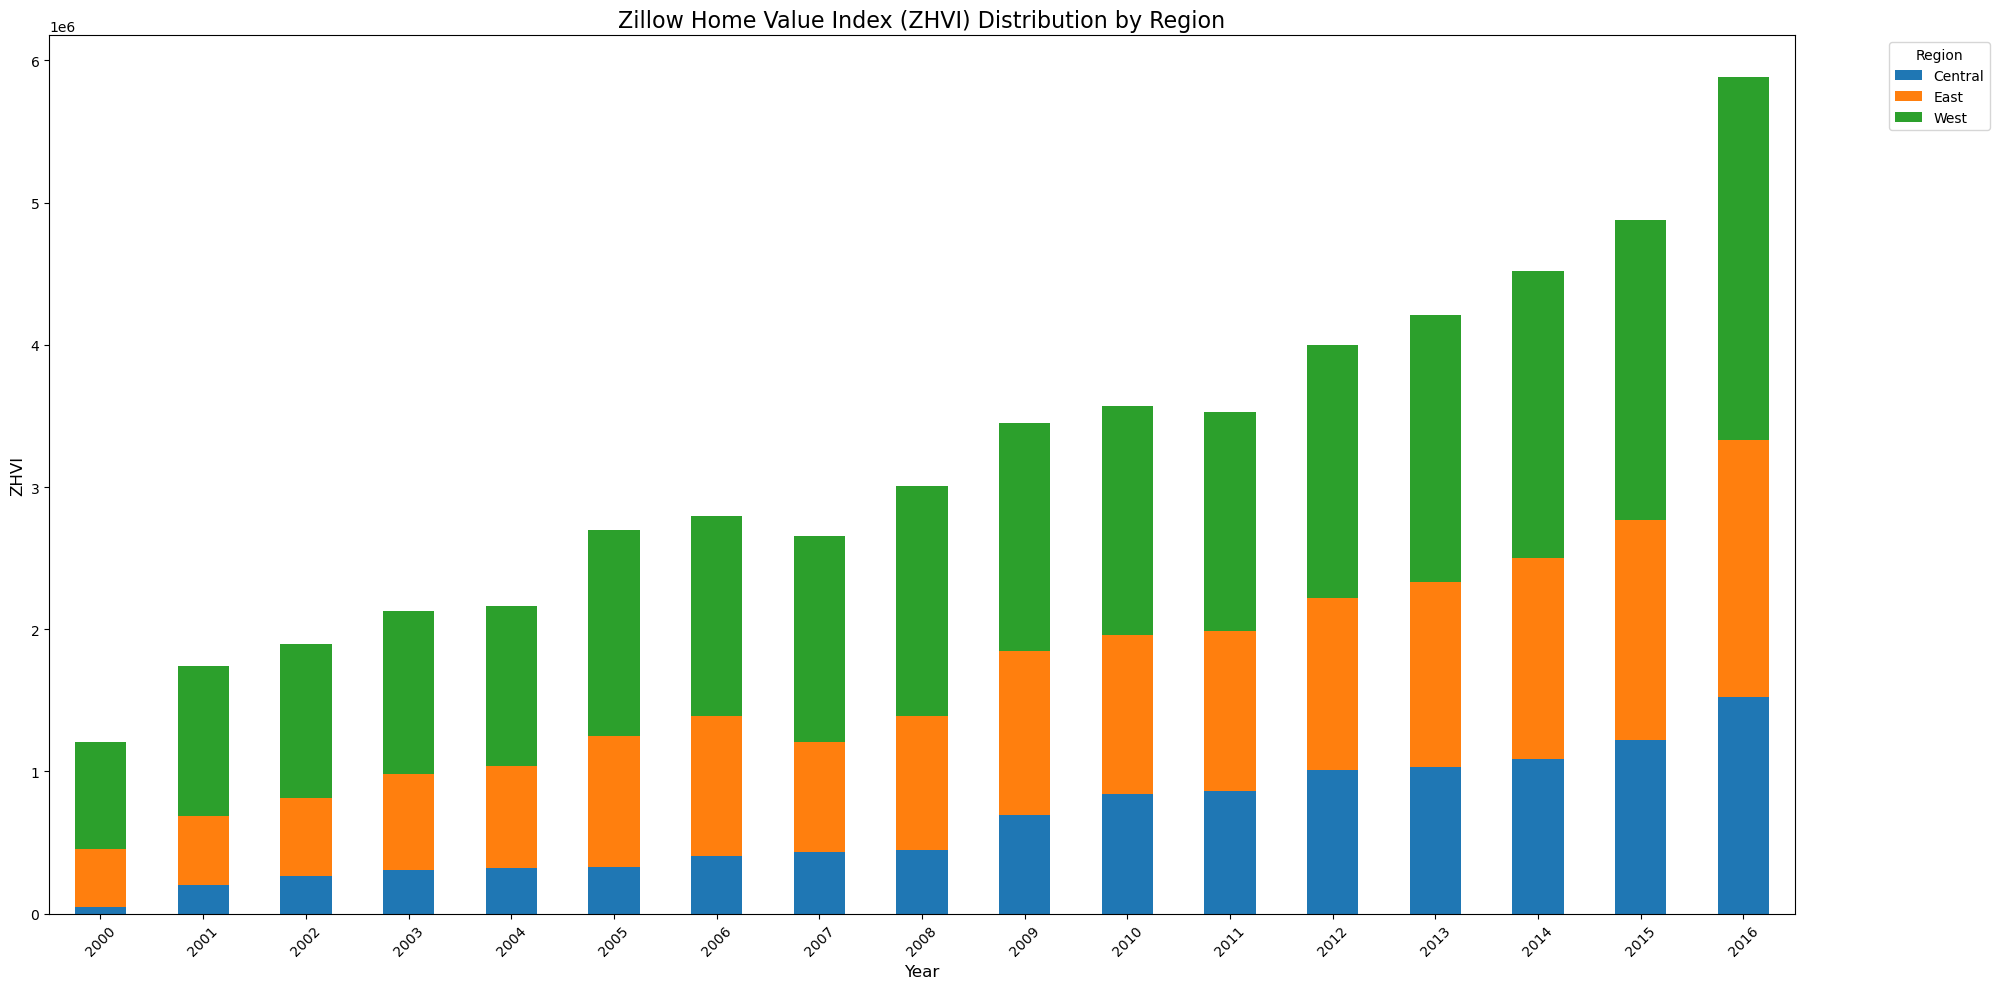

In [302]:
def zhvi_region():
    # Pivot the data to create a matrix suitable for stacked bar chart
    pivot_data = grouped_data.pivot(index='Year', columns='Region', values='ZHVI')

    # Create the stacked bar chart
    fig, ax = plt.subplots(figsize=(20, 10))
    pivot_data.plot(kind='bar', stacked=True, ax=ax)

    plt.title('Zillow Home Value Index (ZHVI) Distribution by Region', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('ZHVI', fontsize=12)
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

zhvi_region()

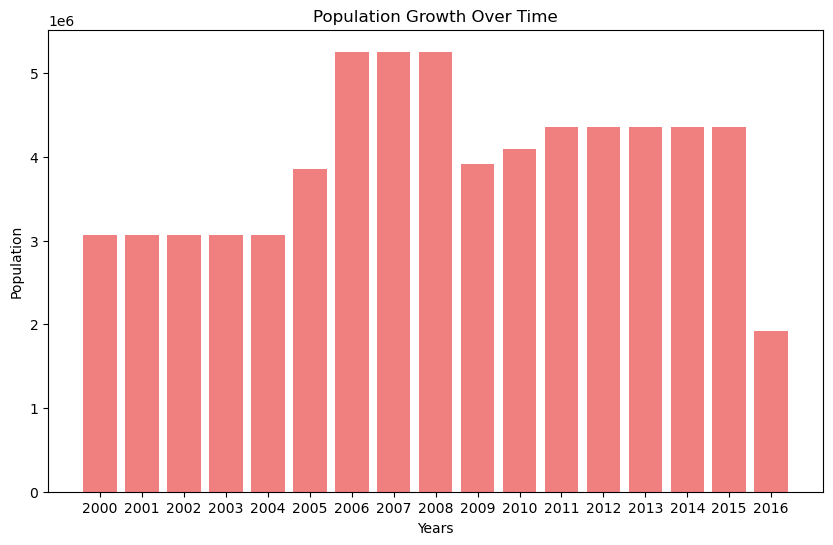

In [303]:
def population_growth_time():
    # Bar chart to show increase or decrease of population over time
    plt.figure(figsize=(10,6))
    plt.bar(data["Year"], data["population"], color="lightcoral")
    plt.xlabel('Years')
    plt.ylabel('Population')
    plt.title('Population Growth Over Time')
    plt.xticks(data['Year'].unique())
    plt.show()

population_growth_time()

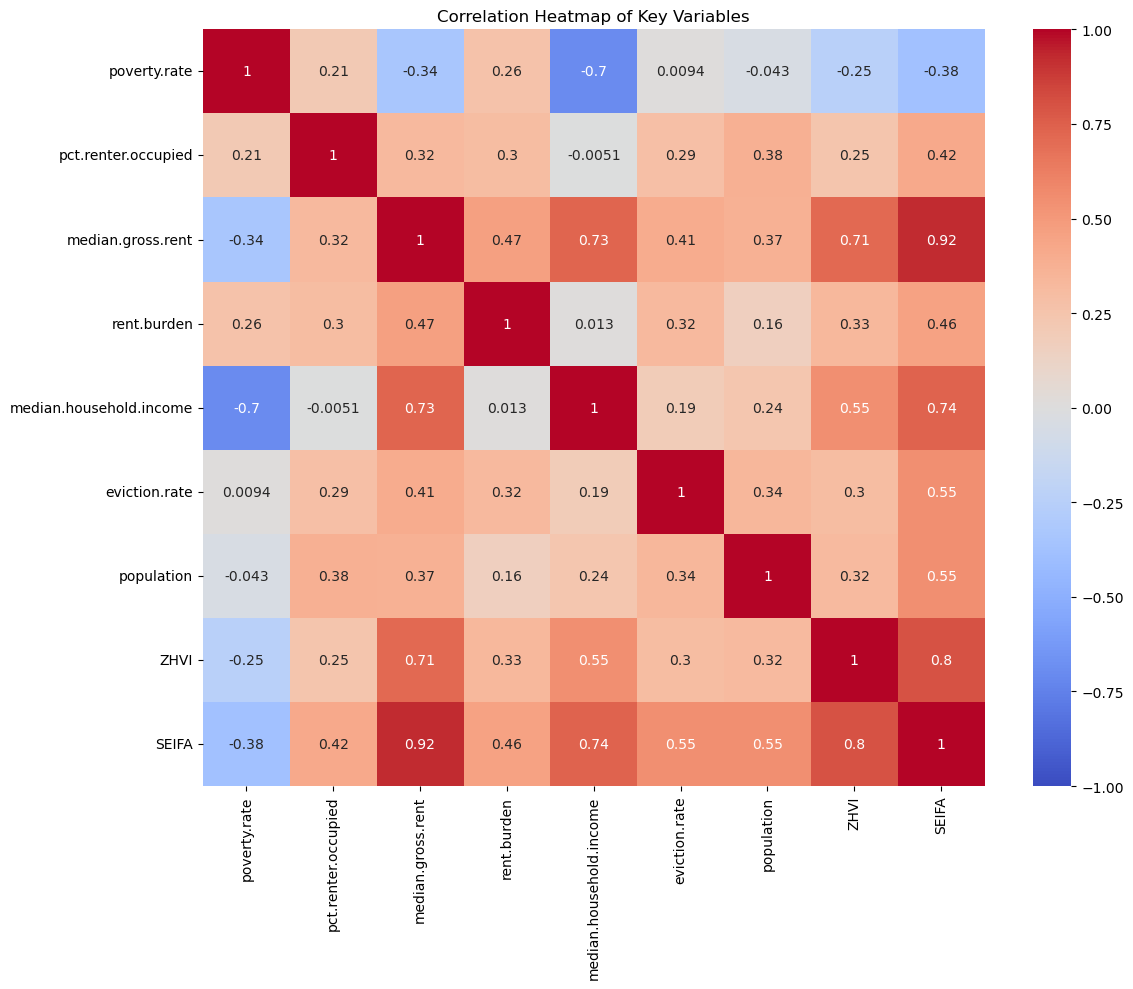

In [304]:
def heatmap():
    # Heatmap of Correlation Matrix
    correlation_matrix = data[['poverty.rate', 'pct.renter.occupied', 'median.gross.rent',
                            'rent.burden', 'median.household.income', 'eviction.rate',
                            'population', 'ZHVI', 'SEIFA']].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Heatmap of Key Variables')
    plt.tight_layout()
    plt.show()

heatmap()

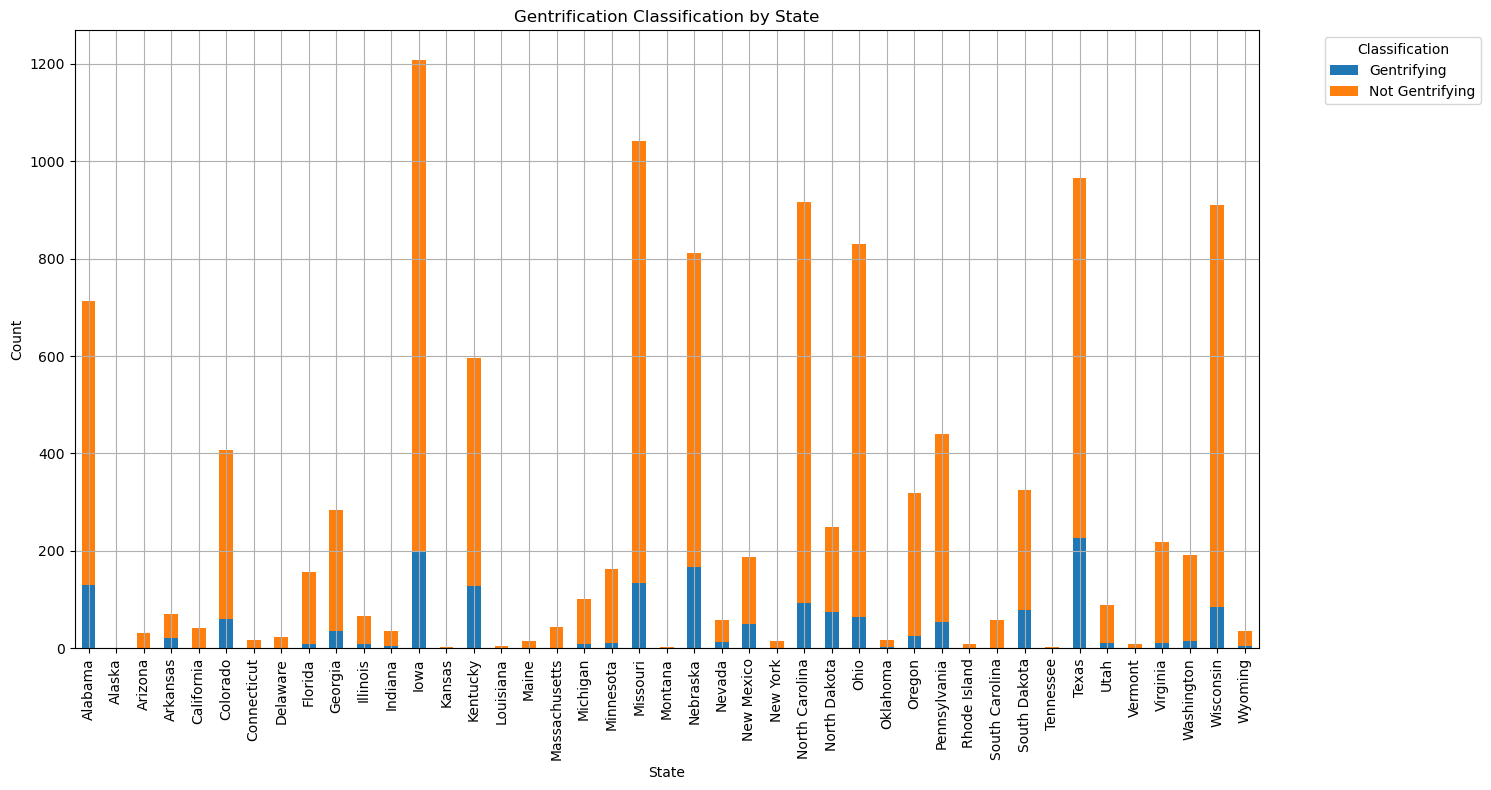

In [305]:
def classification_by_state():
    # Bar Plot of Gentrification Classification by State
    classification_by_state = data.groupby(['State', 'Classification']).size().unstack()
    classification_by_state.plot(kind='bar', stacked=True, figsize=(15, 8))
    plt.title('Gentrification Classification by State')
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

classification_by_state()

In [306]:
# Download the county shapefile (1:500,000 scale)
url = "https://www2.census.gov/geo/tiger/TIGER2023/COUNTY/tl_2023_us_county.zip"
county_gdf = gpd.read_file(url)

county_gdf

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55516 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.2645, -123.72756 46.26..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.5233, -96.69219 40.5231..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.2737 40.1184, -98.27374 40.1224,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,13,123,00351260,13123,0500000US13123,Gilmer,Gilmer County,06,H1,G4020,None,None,None,A,1103893380,12276629,+34.6905232,-084.4548113,"POLYGON ((-84.30237 34.57832, -84.30329 34.577..."
3231,27,135,00659513,27135,0500000US27135,Roseau,Roseau County,06,H1,G4020,None,None,None,A,4329782924,16924046,+48.7610683,-095.8215042,"POLYGON ((-95.25857 48.88666, -95.25707 48.885..."
3232,28,089,00695768,28089,0500000US28089,Madison,Madison County,06,H1,G4020,298,27140,None,A,1849790735,72085470,+32.6343703,-090.0341603,"POLYGON ((-90.14883 32.40026, -90.1489 32.4001..."
3233,48,227,01383899,48227,0500000US48227,Howard,Howard County,06,H1,G4020,None,13700,None,A,2333039148,8841781,+32.3034298,-101.4387208,"POLYGON ((-101.18138 32.21252, -101.18138 32.2..."


In [307]:
# Check if is correct
print("Data Types")
print("GEOID dtype in county_gdf:", county_gdf['GEOID'].dtype)
print("GEOID dtype in data:", data['GEOID'].dtype)

# Print GEOID from county_gdf
print("\nGEOID from county_gdf:")
print(county_gdf[county_gdf['GEOID'] == '56043']['NAME'].values[0])

# Print GEOID from data
print("\nGEOID from data:")
print(data[data['GEOID'] == 56043]['State'].values[0])

Data Types
GEOID dtype in county_gdf: object
GEOID dtype in data: int64

GEOID from county_gdf:
Washakie

GEOID from data:
Wyoming


In [308]:
temp_data = data.copy()
temp_data['GEOID'] = temp_data['GEOID'].astype(str)
merged_gdf = county_gdf.merge(temp_data, on='GEOID', how='left')
data['GEOID'] = data['GEOID'].astype(str)

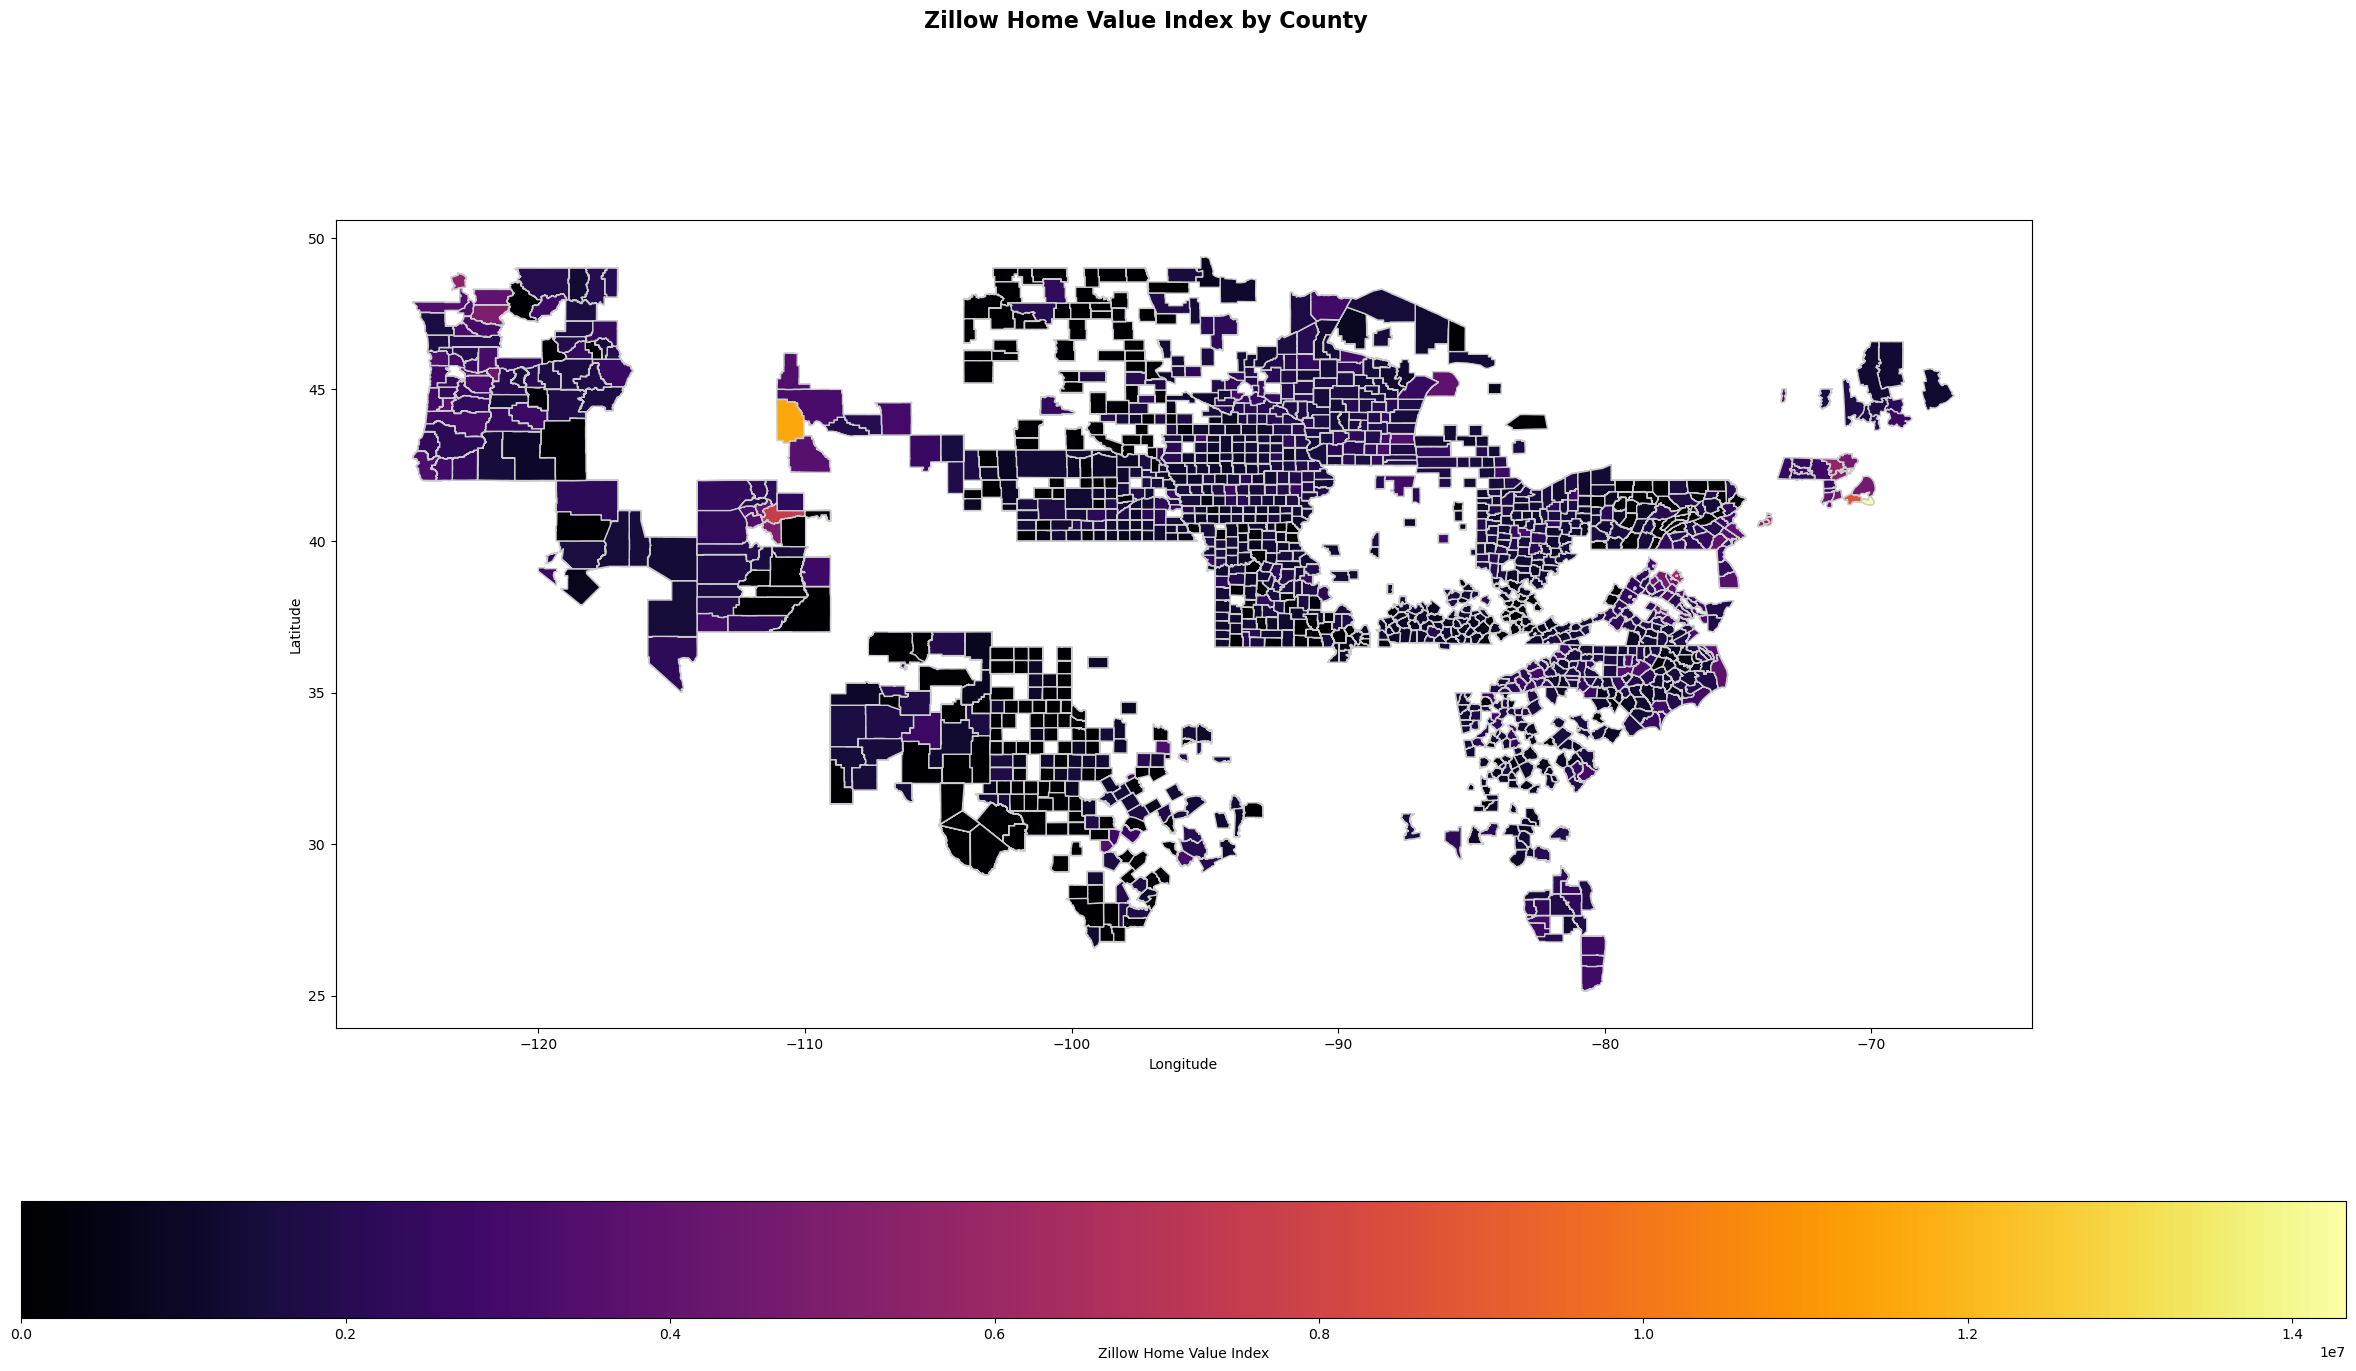

In [309]:
def zhvi_county():
    variable = 'ZHVI'
    fig, ax = plt.subplots(1, figsize=(30, 15))
    merged_gdf.plot(column=variable,
                cmap='inferno',
                linewidth=1,
                ax=ax,
                edgecolor='0.8',
                legend=True,
                legend_kwds={'label': "Zillow Home Value Index",
                                'orientation': "horizontal"})
    # ax.axis('off')
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.suptitle('Zillow Home Value Index by County', fontsize=16, fontweight='bold', y=1.02)
    plt.show()

zhvi_county()

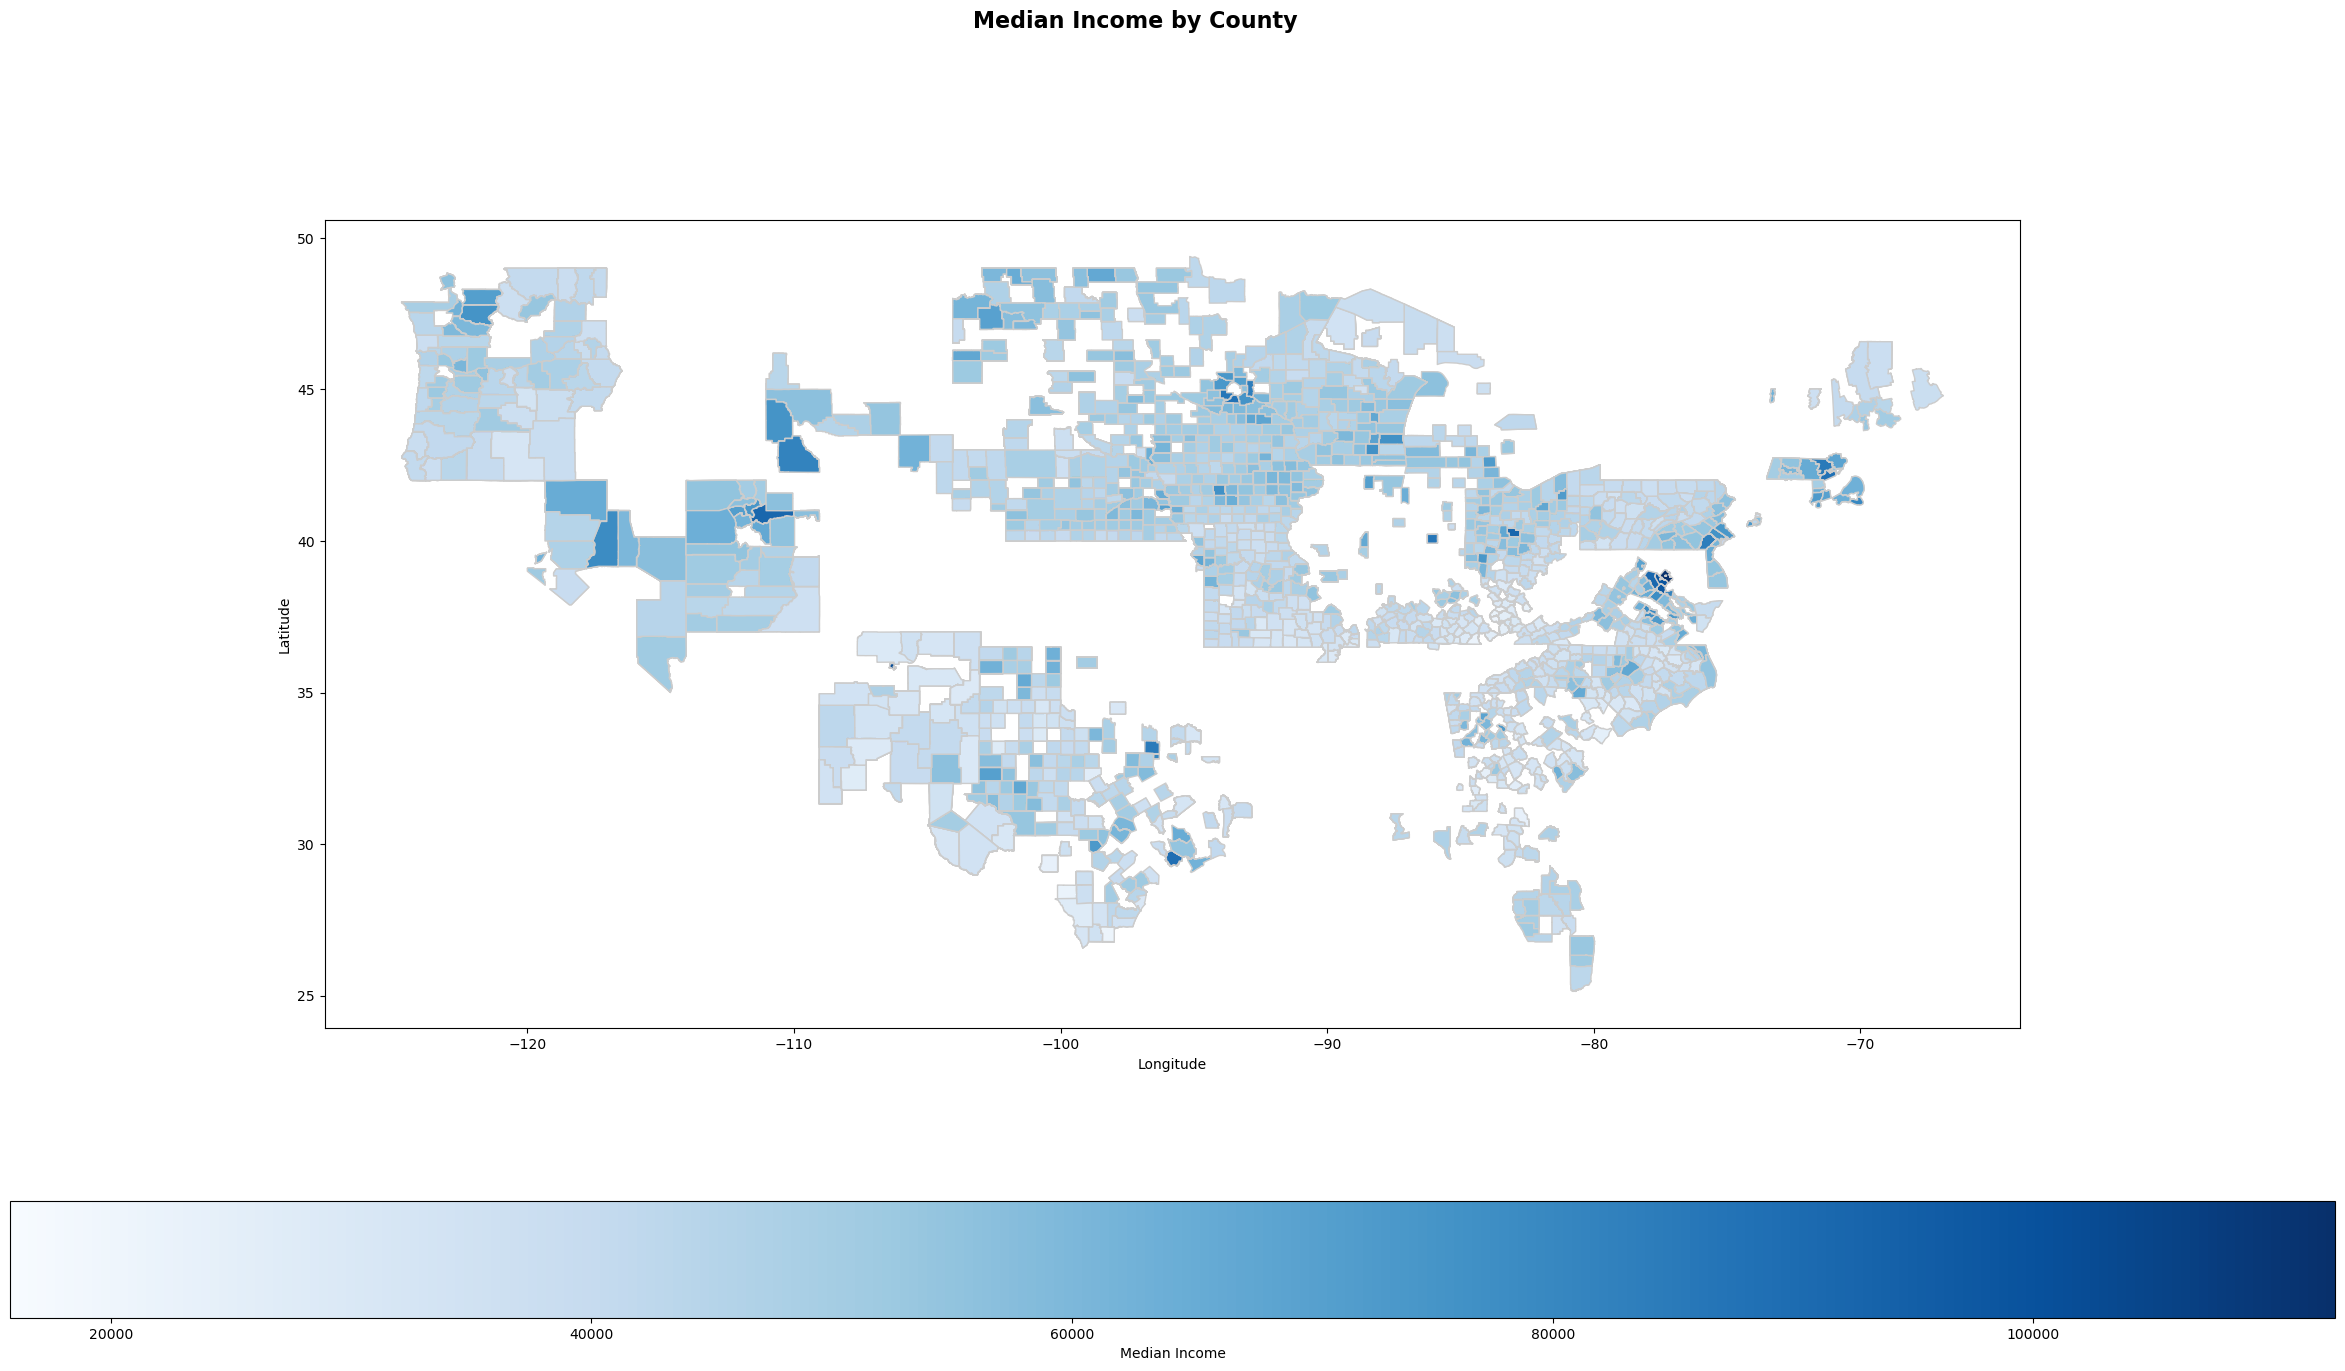

In [310]:
def median_income_county():
    variable = 'median.household.income'
    fig, ax = plt.subplots(1, figsize=(30, 15))
    merged_gdf.plot(column=variable,
                    cmap='Blues',
                    linewidth=1,
                    ax=ax,
                    edgecolor='0.8',
                    legend=True,
                    legend_kwds={'label': "Median Income",
                                'orientation': "horizontal"})
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.suptitle('Median Income by County', fontsize=16, fontweight='bold', y=1.02)
    plt.show()

median_income_county()

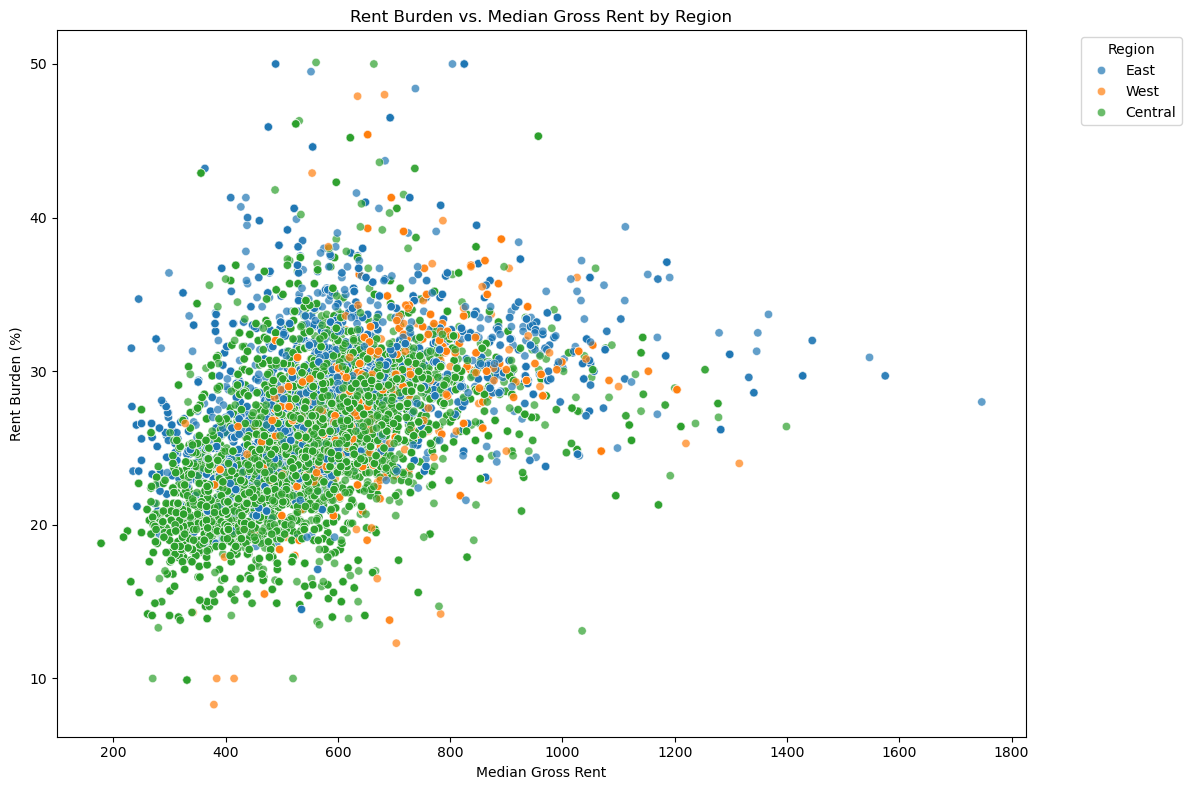

In [311]:
def rent_burden_county():
    # Create a new column 'Region' based on the state
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=data, x='median.gross.rent', y='rent.burden', hue='Region', alpha=0.7)
    plt.title('Rent Burden vs. Median Gross Rent by Region')
    plt.xlabel('Median Gross Rent')
    plt.ylabel('Rent Burden (%)')
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

rent_burden_county()

In [312]:
def household_income_region():
    # Group the data by Year and Region, and calculate the median household income for each group
    grouped_data = data.groupby(['Year', 'Region'])['median.household.income'].median().reset_index()

    # Create a line plot to show trends for Median Household Income over time by region
    fig = px.line(grouped_data, x='Year', y='median.household.income', color='Region')
    fig.update_layout(title='Median Household Income Trend Over Time by Region',
                    xaxis_title='Year',
                    yaxis_title='Median Household Income')
    fig.show()

household_income_region()

In [313]:
def seifa_region():
    # Group the data by Year and Region, and calculate the median household income for each group
    grouped_data = data.groupby(['Year', 'Region'])['SEIFA'].median().reset_index()

    # Create a line plot to show trends for Median Household Income over time by region
    fig = px.line(grouped_data, x='Year', y='SEIFA', color='Region')
    fig.update_layout(title='SEIFA Trend Over Time by Region',
                    xaxis_title='Year',
                    yaxis_title='SEIFA')
    fig.show()

seifa_region()


In [314]:
data["Year"]

0        2008
1        2009
2        2011
3        2012
4        2013
         ... 
11677    2016
11678    2013
11679    2014
11680    2015
11681    2016
Name: Year, Length: 11682, dtype: int64